In [3]:
%matplotlib inline

In [28]:
import pandas as pd
import numpy as np

import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout, to_agraph
import pygraphviz as pgv

from IPython.display import Image
def draw(A):
    return Image(A.draw(format='png', prog='neato'))

In [46]:
index=pd.MultiIndex.from_tuples([
#("Plastic products","Other metal products"),
("Plastic products","Building construction"),
("Electricity","Other business services"),
("Building construction","Electricity"),
("Building construction","Railway transport"),
("Other business services","Building construction"),
("Other business services","Machinery for office and service industry"),
("Other business services","Plastic products")])

IO_table = pd.Series(["%.2f"%v for v in [0.045659,0.,0.044463,0.032911,0.058193,0.010418,0.012085]],index=index)
D = IO_table.unstack().fillna(0)

In [47]:
IO_table

Plastic products         Building construction                        0.05
Electricity              Other business services                      0.00
Building construction    Electricity                                  0.04
                         Railway transport                            0.03
Other business services  Building construction                        0.06
                         Machinery for office and service industry    0.01
                         Plastic products                             0.01
dtype: object

In [50]:
print(IO_table.to_latex())

\begin{tabular}{lll}
\toprule
                        &                  &     0 \\
\midrule
Plastic products & Building construction &  0.05 \\
Electricity & Other business services &  0.00 \\
Building construction & Electricity &  0.04 \\
                        & Railway transport &  0.03 \\
Other business services & Building construction &  0.06 \\
                        & Machinery for office and service industry &  0.01 \\
                        & Plastic products &  0.01 \\
\bottomrule
\end{tabular}



strict digraph "" {
	"Building construction" -> Electricity	 [label=0.04,
		width=0.04];
	"Building construction" -> "Railway transport"	 [label=0.03,
		width=0.03];
	Electricity -> "Other business services"	 [label=0.00,
		width=0.00];
	"Other business services" -> "Building construction"	 [label=0.06,
		width=0.06];
	"Other business services" -> "Machinery for office and service industry"	 [label=0.01,
		width=0.01];
	"Other business services" -> "Plastic products"	 [label=0.01,
		width=0.01];
	"Plastic products" -> "Building construction"	 [label=0.05,
		width=0.05];
}



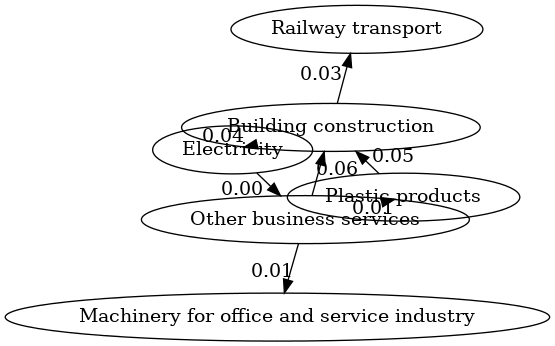

In [49]:
G = nx.DiGraph()
for i in D.index:
    for j in D.columns:
        if D.loc[i,j] != 0:
            G.add_edge(i,j,width=D.loc[i,j],label=D.loc[i,j])
A = to_agraph(G)
print(A)
A.layout('dot')
A.draw('IO_Example.png')
draw(A)

In [56]:
X = pd.DataFrame([
    ["UCLA","Arizona",80,79],
    ["UCLA","Arizona",81,70],
    ["Arizona","Delaware_St",82,74],
    ["Arizona","Delaware_St",83,81],
    ["Howard","Delaware_St",93,84],
    ["Howard","Delaware_St",80,85],
    ["Howard","Arizona",79,78]
],columns=["Team 1","Team 2", "Team 1 Score", "Team 2 Score"])
X

,Team 1,Team 2,Team 1 Score,Team 2 Score
0,UCLA,Arizona,80,79
1,UCLA,Arizona,81,70
2,Arizona,Delaware_St,82,74
3,Arizona,Delaware_St,83,81
4,Howard,Delaware_St,93,84
5,Howard,Delaware_St,80,85
6,Howard,Arizona,79,78


In [57]:
print(X.to_latex())

\begin{tabular}{lllrr}
\toprule
{} &   Team 1 &       Team 2 &  Team 1 Score &  Team 2 Score \\
\midrule
0 &     UCLA &      Arizona &            80 &            79 \\
1 &     UCLA &      Arizona &            81 &            70 \\
2 &  Arizona &  Delaware\_St &            82 &            74 \\
3 &  Arizona &  Delaware\_St &            83 &            81 \\
4 &   Howard &  Delaware\_St &            93 &            84 \\
5 &   Howard &  Delaware\_St &            80 &            85 \\
6 &   Howard &      Arizona &            79 &            78 \\
\bottomrule
\end{tabular}



In [58]:
teams = np.unique(list(X["Team 1"])+list(X["Team 2"]))
D=pd.DataFrame(np.zeros((len(teams),len(teams))),columns=teams,index=teams)
for index,row in X.iterrows():
    diff = row.loc["Team 1 Score"] - row.loc["Team 2 Score"]
    if diff > 0:
        D.loc[row.loc["Team 1"],row.loc["Team 2"]] += diff
    elif diff < 0:
        D.loc[row.loc["Team 2"],row.loc["Team 1"]] += abs(diff)
D = D.astype(int)
D

,Arizona,Delaware_St,Howard,UCLA
Arizona,0,10,0,0
Delaware_St,0,0,5,0
Howard,1,9,0,0
UCLA,12,0,0,0


In [59]:
G = nx.DiGraph()
for i in D.index:
    for j in D.columns:
        if D.loc[i,j] != 0:
            G.add_edge(i,j,width=D.loc[i,j],label=D.loc[i,j])

strict digraph "" {
	Arizona -> Delaware_St	 [label=10,
		width=10];
	Delaware_St -> Howard	 [label=5,
		width=5];
	Howard -> Arizona	 [label=1,
		width=1];
	Howard -> Delaware_St	 [label=9,
		width=9];
	UCLA -> Arizona	 [label=12,
		width=12];
}



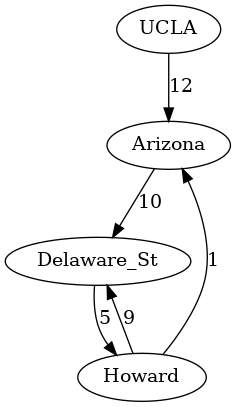

In [60]:
A = to_agraph(G)
print(A)
A.layout('dot')
A.draw('NCAA_Example.png')
draw(A)

In [58]:
movielens_data = pd.DataFrame([
    [1,"Spellbound (1945)",3,"Mystery"],
    [1,"Cop Land (1997)",4,"Mystery"],
    [1,"L.A. Confidential (1997)",5,"Mystery"],
    [2,"Spellbound (1945)",4,"Mystery"],
    [2,"Cop Land (1997)",2,"Mystery"]],columns=["User ID","Title","Rating","Genre"])
movielens_data

,User ID,Title,Rating,Genre
0,1,Spellbound (1945),3,Mystery
1,1,Cop Land (1997),4,Mystery
2,1,L.A. Confidential (1997),5,Mystery
3,2,Spellbound (1945),4,Mystery
4,2,Cop Land (1997),2,Mystery


In [60]:
print(movielens_data.set_index('User ID').to_latex())

\begin{tabular}{llrl}
\toprule
{} &                     Title &  Rating &    Genre \\
User ID &                           &         &          \\
\midrule
1       &         Spellbound (1945) &       3 &  Mystery \\
1       &           Cop Land (1997) &       4 &  Mystery \\
1       &  L.A. Confidential (1997) &       5 &  Mystery \\
2       &         Spellbound (1945) &       4 &  Mystery \\
2       &           Cop Land (1997) &       2 &  Mystery \\
\bottomrule
\end{tabular}



In [63]:
movies = ["Spellbound (1945)","Cop Land (1997)","L.A. Confidential (1997)"]
D = pd.DataFrame(
    [
        [0,2,0],
        [1,0,0],
        [2,1,0]
    ],index=movies,columns=movies
)
D

,Spellbound (1945),Cop Land (1997),L.A. Confidential (1997)
Spellbound (1945),0,2,0
Cop Land (1997),1,0,0
L.A. Confidential (1997),2,1,0


strict digraph "" {
	"Spellbound (1945)" -> "Cop Land (1997)"	 [label=2,
		width=2];
	"Cop Land (1997)" -> "Spellbound (1945)"	 [label=1,
		width=1];
	"L.A. Confidential (1997)" -> "Spellbound (1945)"	 [label=2,
		width=2];
	"L.A. Confidential (1997)" -> "Cop Land (1997)"	 [label=1,
		width=1];
}



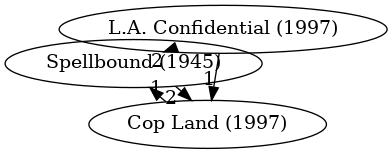

In [64]:
G = nx.DiGraph()
for i in D.index:
    for j in D.columns:
        if D.loc[i,j] != 0:
            G.add_edge(i,j,width=D.loc[i,j],label=D.loc[i,j])

A = to_agraph(G)
print(A)
A.layout('dot')
A.draw('movielens_example.png')
draw(A)